In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
gtex=pd.read_csv('../data/gtex_tpm_median.csv.gz',index_col=0)
gtex.shape

(54, 49422)

In [6]:
ips=pd.read_csv('../data/ips_tpm.csv',index_col=0)
ips.shape

(330, 35049)

In [7]:
esc= pd.read_csv('../data/es_tpm.csv.gz', index_col=0)
esc.shape

(30, 49878)

In [8]:
df=pd.concat([gtex.mean(),ips.median()],axis=1)
df.columns=['non','ips']
df=df.dropna()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
df=df[~df.index.str.startswith('MT')]
df=df[~df.index.str.startswith('RP')]

In [10]:
tf=pd.read_csv('http://humantfs.ccbr.utoronto.ca/download/v_1.01/TF_names_v_1.01.txt',header=None)[0].values
len(tf)

1639

In [11]:
df=df.loc[df.index.intersection(tf)].drop('ZNF90')

In [12]:
df['ips/non']=(df.ips+1)/(df.non+1)

In [13]:
topi=df.sort_values('ips/non').tail(20)
topi

,non,ips,ips/non
SOX11,0.361332,27.675,21.063936
NR6A1,2.662632,78.955,21.829930
HMGA1,71.529864,1649.030,22.749664
MYCN,1.403588,54.825,23.225695
ETV4,2.473795,79.705,23.232516
ZNF93,1.242721,60.690,27.506759
PRDM14,0.016939,28.460,28.969292
ZIC3,1.221574,65.760,30.050767
ZNF730,0.233963,38.130,31.710831
TERF1,15.321696,630.370,38.682868


In [14]:
top=ips[topi.index]
top.head()

,SOX11,NR6A1,HMGA1,MYCN,ETV4,ZNF93,PRDM14,ZIC3,ZNF730,TERF1,OTX2,FOXH1,SALL4,NANOG,LIN28B,HES3,HMGA2,ZFP42,ZSCAN10,LIN28A
HPSI1213i-xuja_2,18.25,121.60,1472.39,40.83,127.80,6.55,9.11,25.89,29.39,372.52,12.41,33.59,50.82,29.70,59.59,11.90,116.87,1.45,124.57,604.83
HPSI0614i-voce_2,38.46,46.59,1512.42,42.43,160.50,62.64,34.90,74.20,39.74,548.07,23.39,103.33,61.61,294.24,98.49,87.72,101.83,120.50,124.65,719.11
HPSI0814i-doao_2,18.77,125.40,1560.67,63.13,94.98,46.75,8.18,47.42,14.00,324.28,71.03,45.55,59.89,50.72,51.61,48.33,111.52,19.19,149.76,582.86
HPSI0314i-sojd_3,26.91,63.96,1796.48,56.77,162.83,45.67,39.83,51.24,18.90,497.83,22.17,70.62,50.65,158.80,59.97,115.94,124.68,96.13,162.28,603.57
HPSI0114i-lexy_2,15.77,73.23,1840.20,66.68,98.88,43.36,39.70,62.78,20.22,494.42,73.53,38.39,66.87,112.58,62.68,35.43,101.78,136.03,178.80,623.28


In [15]:
top=top[top.median().sort_values(ascending=False).index]

[None]

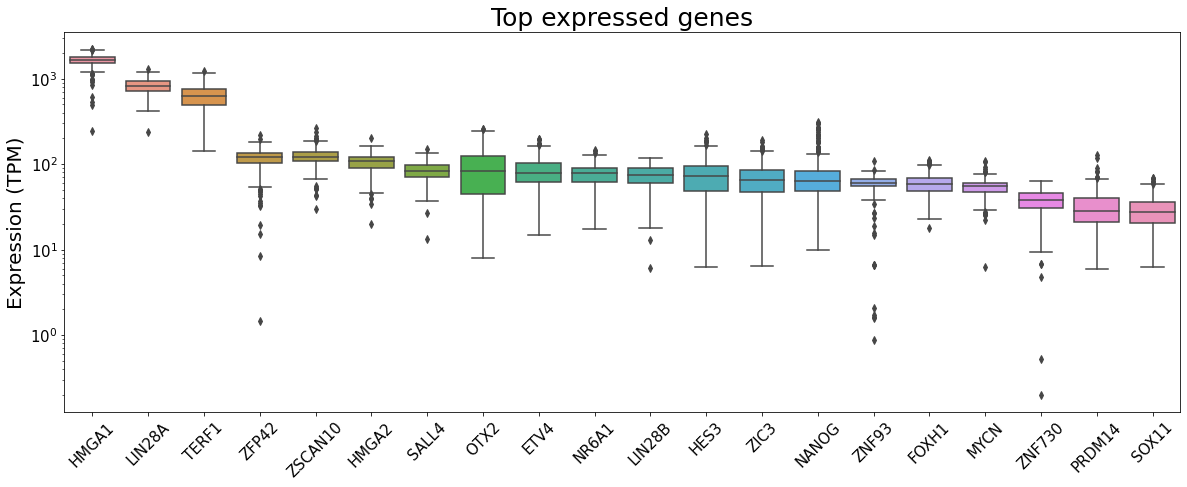

In [16]:
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=45);
b=sns.boxplot(data=top,ax=ax);
#b=sns.lineplot(data=test,linewidth=2,ax=ax)
b.axes.set_title("Top expressed genes",fontsize=25)
b.set_ylabel("Expression (TPM)",fontsize=20)
b.set_xlabel('',fontsize=0)
b.tick_params(labelsize=15)
ax.set(yscale="log")

In [44]:
test=ips.head(1)[top.median().sort_values(ascending=False).index].T
print(test)
print(type(test))

         HPSI1213i-xuja_2
HMGA1             1472.39
LIN28A             604.83
TERF1              372.52
ZFP42                1.45
ZSCAN10            124.57
HMGA2              116.87
SALL4               50.82
OTX2                12.41
ETV4               127.80
NR6A1              121.60
LIN28B              59.59
HES3                11.90
ZIC3                25.89
NANOG               29.70
ZNF93                6.55
FOXH1               33.59
MYCN                40.83
ZNF730              29.39
PRDM14               9.11
SOX11               18.25
<class 'pandas.core.frame.DataFrame'>


[None]

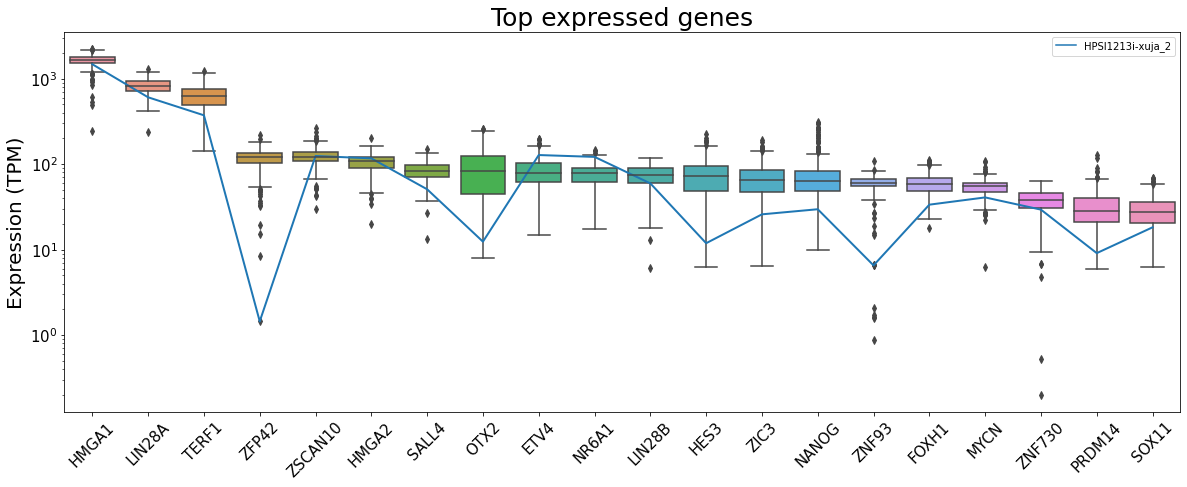

In [49]:
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=45);
b=sns.boxplot(data=top,ax=ax);
b=sns.lineplot(data=test,linewidth=2,ax=ax,sort=False);
b.axes.set_title("Top expressed genes",fontsize=25)
b.set_ylabel("Expression (TPM)",fontsize=20)
b.set_xlabel('',fontsize=0)
b.tick_params(labelsize=15)
ax.set(yscale="log")

[None]

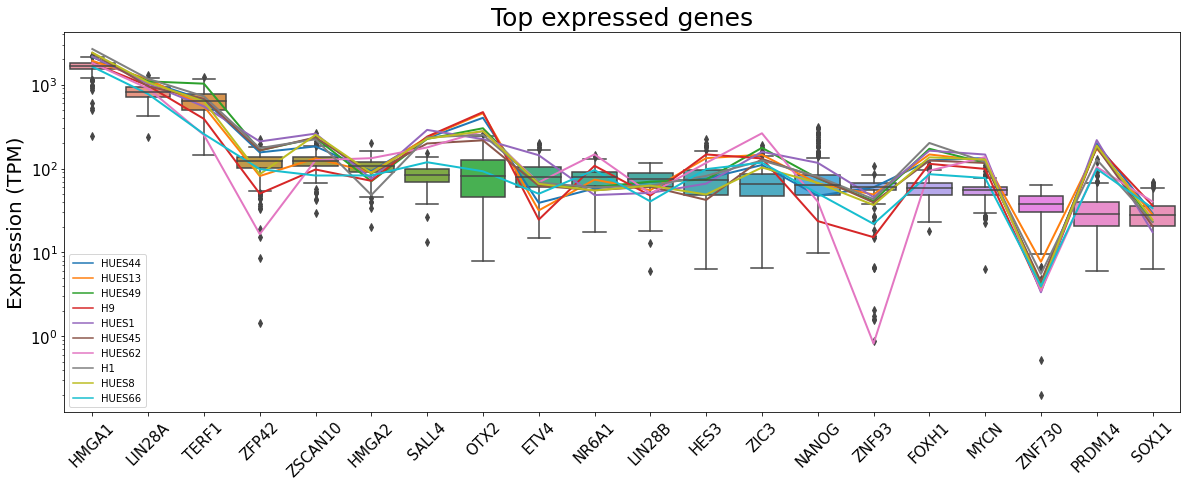

In [52]:
test=esc.head(10)[top.median().sort_values(ascending=False).index].T
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=45);
b=sns.boxplot(data=top,ax=ax);
b=sns.lineplot(data=test,linewidth=2,ax=ax,dashes=False,sort=False);
b.axes.set_title("Top expressed genes",fontsize=25)
b.set_ylabel("Expression (TPM)",fontsize=20)
b.set_xlabel('',fontsize=0)
b.tick_params(labelsize=15)
ax.set(yscale="log")

In [26]:
esc['HMGA1'].min()

1172.76